In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report

In [2]:
pf = pd.read_csv("cardiac arrest dataset.csv")

In [3]:
pf.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
pf.quantile

<bound method DataFrame.quantile of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0      

In [5]:
pf['target'].unique()

array([0, 1])

In [6]:
count_sex = pf['sex'].value_counts()

([<matplotlib.patches.Wedge at 0x23e1f068830>,
 [Text(-0.6342286140037023, 0.8987513923098773, '1'),
  Text(0.6342286925750452, -0.8987513368638452, '0')],
 [Text(-0.3459428803656558, 0.4902280321690239, '70%'),
  Text(0.34594292322275194, -0.4902280019257337, '30%')])

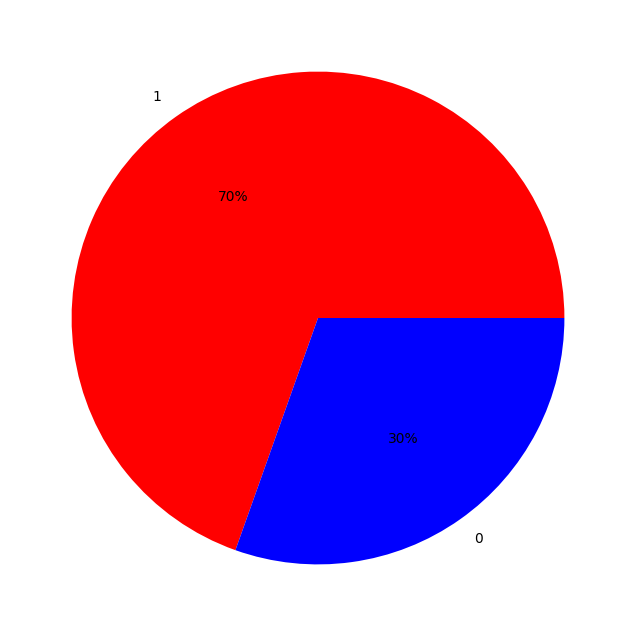

In [7]:
plt.figure(figsize=(10, 8))
plt.pie(count_sex, labels=count_sex.index, colors=['red', 'blue'], autopct="%1.f%%")

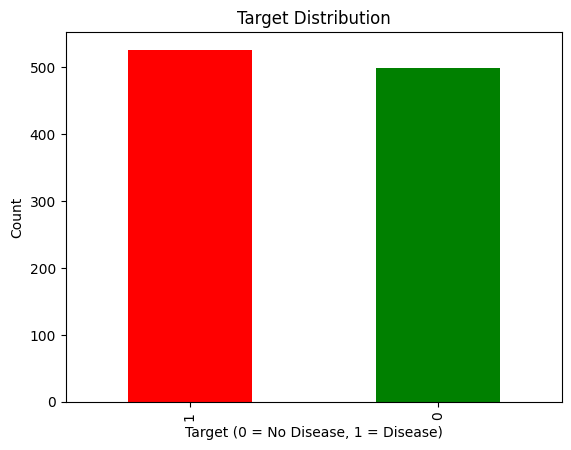

In [14]:
pf['target'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.title("Target Distribution")
plt.show()

<Axes: >

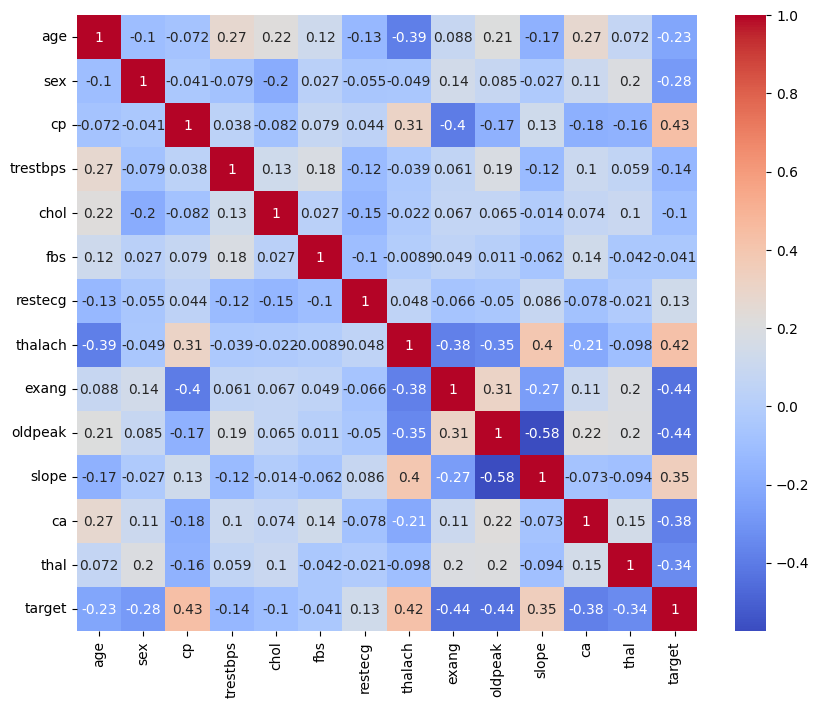

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(pf.corr(), cmap="coolwarm", annot=True)

In [21]:
x = pf.drop('target', axis=1)
y = pf['target']

In [18]:
x_number = x.select_dtypes(include=np.number)

In [25]:
select = SelectKBest(score_func=f_classif, k=6)
select.fit(x_number, y)
select_feature = x_number.columns[select.get_support()]
print("Selected Features:", select_feature.tolist())
x_select = select.transform(x_number)


Selected Features: ['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']


In [27]:
select_feature

Index(['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca'], dtype='object')

In [28]:
x = pf[select_feature]
y = pf['target']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3, stratify=y)

In [30]:
scaler = StandardScaler()

In [31]:
scaler_train = scaler.fit_transform(x_train)
scaler_test = scaler.transform(x_test)

In [32]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

In [35]:
for name, model in models.items():
    model.fit(scaler_train, y_train)   
    y_pred = model.predict(scaler_test)
    print(f"📊 {name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")

📊 Logistic Regression Accuracy: 0.84
📊 Decision Tree Accuracy: 0.98
📊 Random Forest Accuracy: 0.99
📊 XGBoost Accuracy: 0.98
📊 SVM Accuracy: 0.87
📊 KNN Accuracy: 0.85


C:\Users\SYED MUSTAFA\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:50:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
